In [1]:
#Install
! pip3 install --upgrade pip
! pip install qiskit[visualization]==0.46
! pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.4 MB/s eta 0:00:00
  Created wheel for pylatexenc

In [ ]:
# import libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_state_qsphere, plot_histogram
from math import pi

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


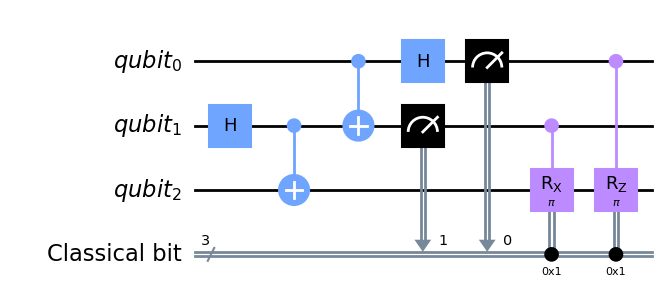

In [ ]:
# Create bits
qubits = QuantumRegister(3, 'qubit')
classical = ClassicalRegister(3, 'Classical bit')

# Circuit
qc = QuantumCircuit(qubits,classical)
# Prepare state - entagle bob and alice qubits
qc.h(qubits[1])
qc.cx(qubits[1], qubits[2])
# Entangle alice qubit with state to be teleportes
qc.cx(qubits[0], qubits[1])
qc.h(qubits[0])
# Measurements
qc.measure(0,0)
qc.measure(1,1)
# Unitary transformation
qc.crx(pi, qubits[1], qubits[2]).c_if(classical, 1)
qc.crz(pi, qubits[0], qubits[2]).c_if(classical, 1)
# Visualize circuit
qc.draw(output='mpl')

<ipython-input-7-bea65f28b6dc>:1: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  backend = Aer.get_backend('statevector_simulator')
<ipython-input-7-bea65f28b6dc>:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(qc, backend).result()


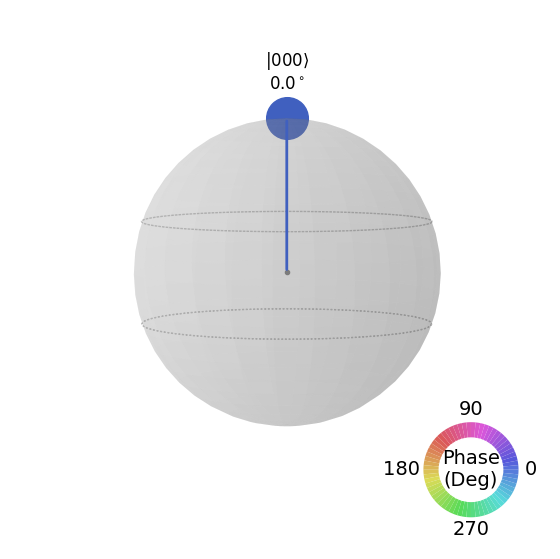

In [ ]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
statevector = result.get_statevector(qc)
plot_state_qsphere(statevector, show_state_phases = True, use_degrees = True)

<ipython-input-8-5a1705ba5636>:3: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, simulator, shots=2000)


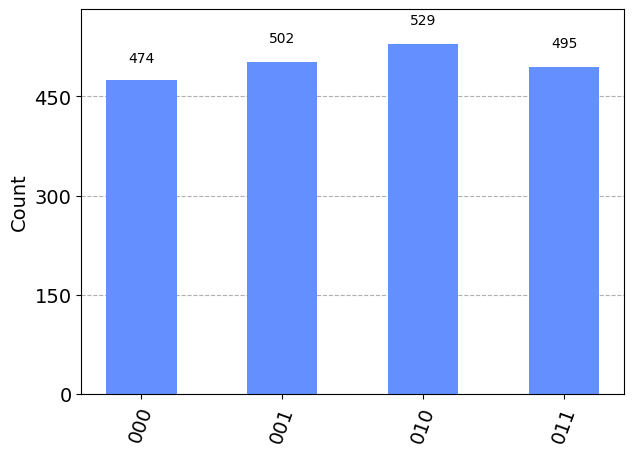

In [ ]:
# Execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=2000)
result = job.result()

# Get the counts (how many times each result was measured)
counts = result.get_counts(qc)

# Plot the results
plot_histogram(counts)